In [1447]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import  Image

In [1572]:
path = '/Users/sjhuang/Documents/docs/dataset/unlabel_data/unlabel_data/zxgk.court.gov.cn'

In [1573]:
import os
img_paths = os.listdir(path)


3.125 2.7083333333333335 (130, 48)


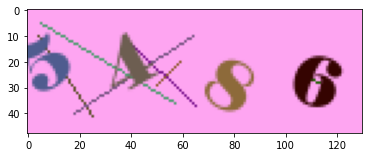

In [1450]:
img = Image.open(os.path.join(path,img_paths[0]))
print(100/32,img.size[0]/img.size[1],img.size)
plt.imshow(img)
plt.show()


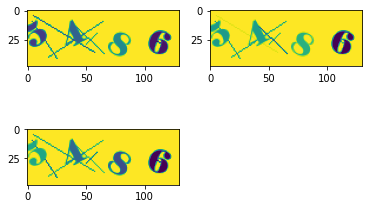

In [1451]:
# RGB 通道
data = img.split()
r,g,b = data[0],data[1],data[2]
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(r)
plt.subplot(2, 2, 2)
plt.imshow(g)
plt.subplot(2, 2, 3)
plt.imshow(b)
plt.show()


In [1452]:
bg = None
if img.mode == 'RGBA':
    bg = img.split()[3]
    print(bg.mode)
if bg is not None:
    plt.imshow(bg)
    plt.show()


In [1453]:
def to_threshold(lim, threshold  = 10, l = 0, m = 1 ):
    table  =  []
    for  i  in  range( 256 ):
        if  i  < threshold:
            table.append(l)
        else :
            table.append(m)
     #  convert to binary image by the table 
    bim  =  lim.point(table,"1" )
    return bim


In [1454]:
#灰度图片
 #  setup a converting table with constant threshold 

if bg is not None:
    to_threshold(bg,255)

In [1455]:
t = None
if img.mode == 'RGBA':
    t = img.convert('RGB')
    print(t.mode)

t


In [1456]:
background = None
if img.mode == 'RGBA':
    png = Image.open(os.path.join(path,img_paths[0]))
    png.load() # required for png.split()

    background = Image.new("RGB", png.size, (255, 255, 255))
    background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background

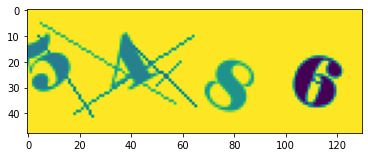

In [1457]:
#灰度图片
 #  setup a converting table with constant threshold 
if background is not None:
    lim  =  background.convert("L")
else:
    lim = img.convert('L')
plt.imshow(lim)
plt.show()

In [1458]:

imgs = [r,g,b,lim]
thresholds = [115,140,120,130]
for img,threshold in zip(imgs,thresholds):
    to_threshold(img,threshold = threshold)

In [1459]:
def handle_img(img_path, threshold = 200,thresholds = [115,140,120,130]):
    img = Image.open(os.path.join(path,img_path))
    print(100/32,img.size[0]/img.size[1],img.size,img_path, img.mode)
    ans = [img]
    titles = ['img']
    if img.mode == 'RGBA':
        r,g,b,a = img.split()
        a_s = to_threshold(a,threshold,1,0)
        img.load() # required for png.split()
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=a) # 3 is the alpha channel
        lim  =  background.convert("L")
        ans.extend([r,g,b,a,a_s,background,lim])
        titles.extend(['r','g','b','a','a_s','bg','lim'])
    else:
        lim = img.convert('L')
        r,g,b = img.split()
        ans.extend([r,g,b,lim])
        titles.extend(['r','g','b','lim'])
    imgs = [r,g,b,lim]
    imgs_t = ['r_t','g_t','b_t','lim_t']
    titles.extend(imgs_t)
    for img_,threshold_ in zip(imgs,thresholds):
        print(img_.mode)
        ans.append(to_threshold(img_,threshold = threshold_))
    fig, ax = plt.subplots(3, 5,figsize = (21,7)) 
    for idx,i in enumerate(ans):
        x = int(idx/5)
        y = int(idx - x*5)
        ax[x,y].set_title(titles[idx])
        ax[x,y].imshow(i)
    plt.show()
    return ans,img_path

3.125 2.2857142857142856 (160, 70) npQF.png RGBA
L
L
L
L


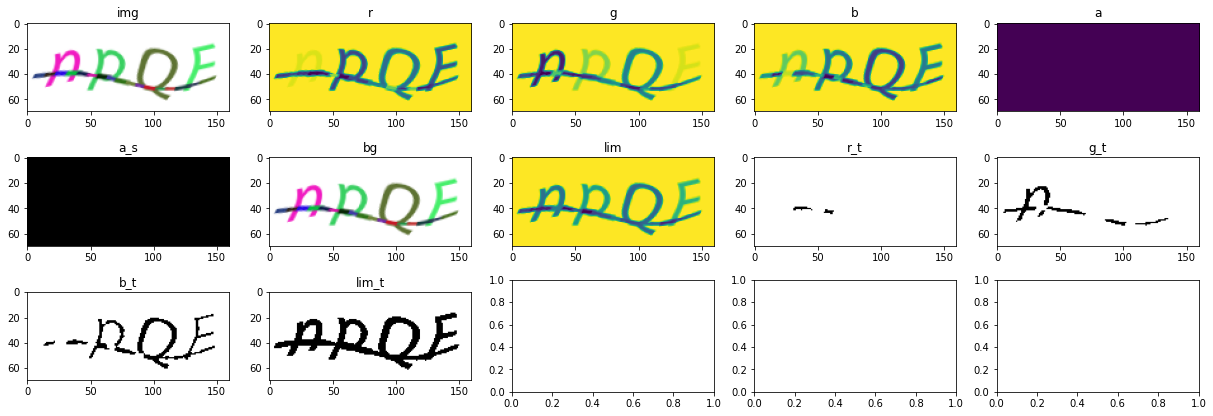

In [1664]:
threshold = 255
thresholds = [20,80,110,230]
idx = 50
res,img_path = handle_img(img_paths[idx], threshold, thresholds)

In [1663]:
ori,handled = res[7],res[11]
ori_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/ori/{img_path}'
handled_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/handle/{img_path}'
ori.save(ori_path)
handled.save(handled_path)

0it [00:00, ?it/s]

3.125 2.4 (60, 25) kqi7.png RGB
L
L
L
L


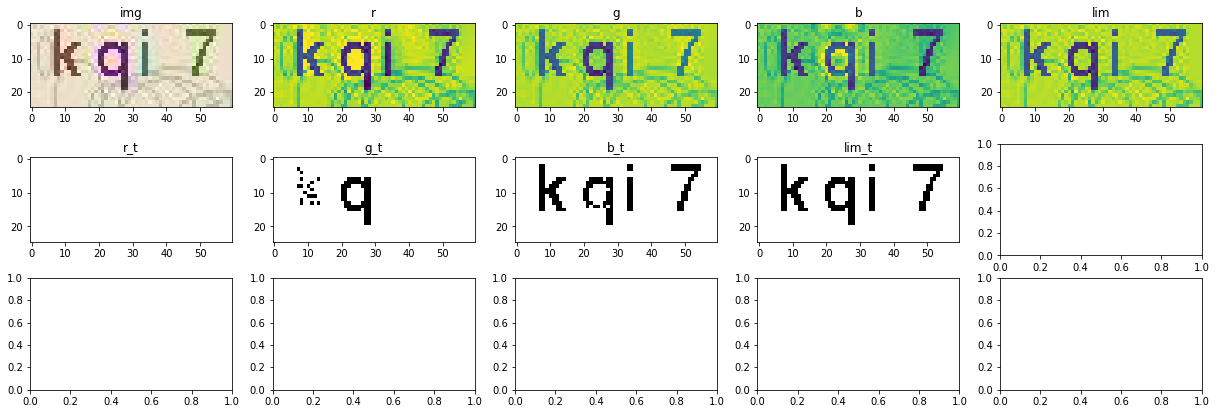

1it [00:01,  1.48s/it]

3.125 2.4 (60, 25) hsxg.png RGB
L
L
L
L


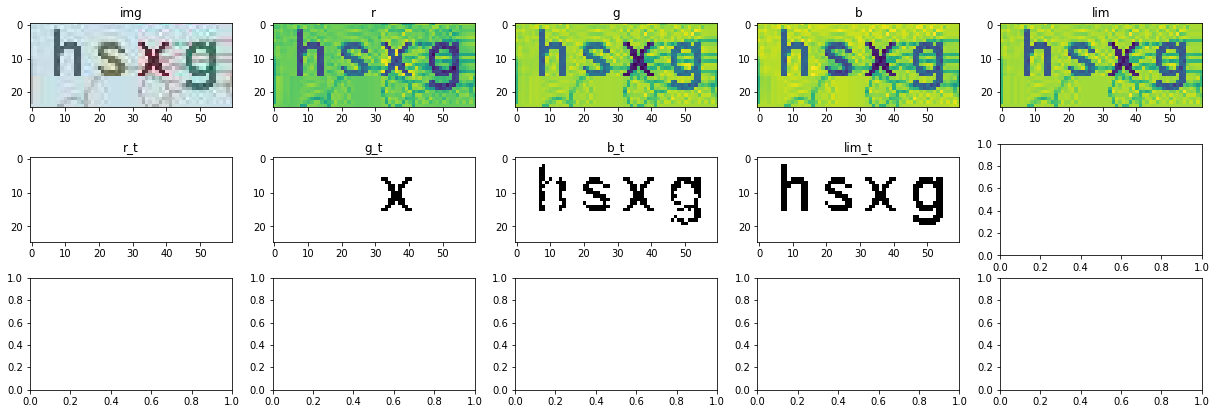

2it [00:03,  1.67s/it]

3.125 2.4 (60, 25) 0eu8.png RGB
L
L
L
L


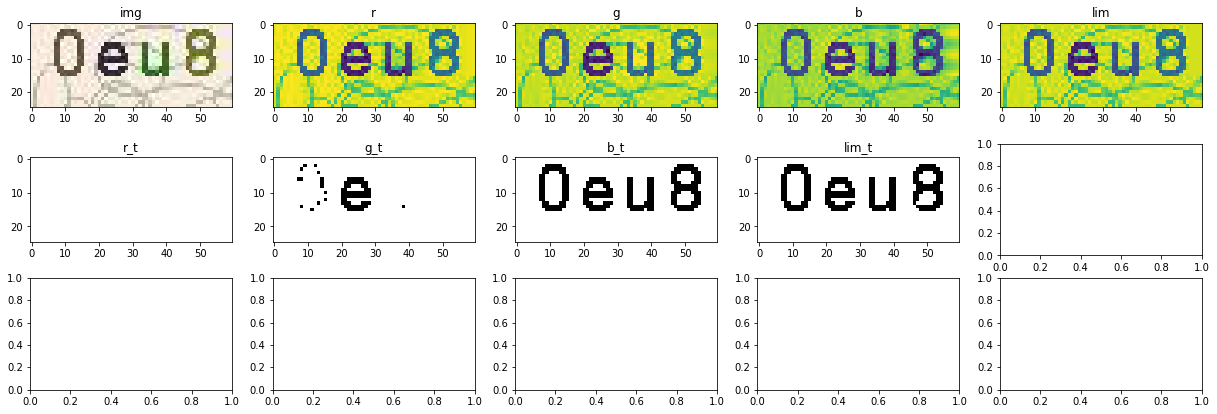

3it [00:04,  1.64s/it]

3.125 2.4 (60, 25) mhln.png RGB
L
L
L
L


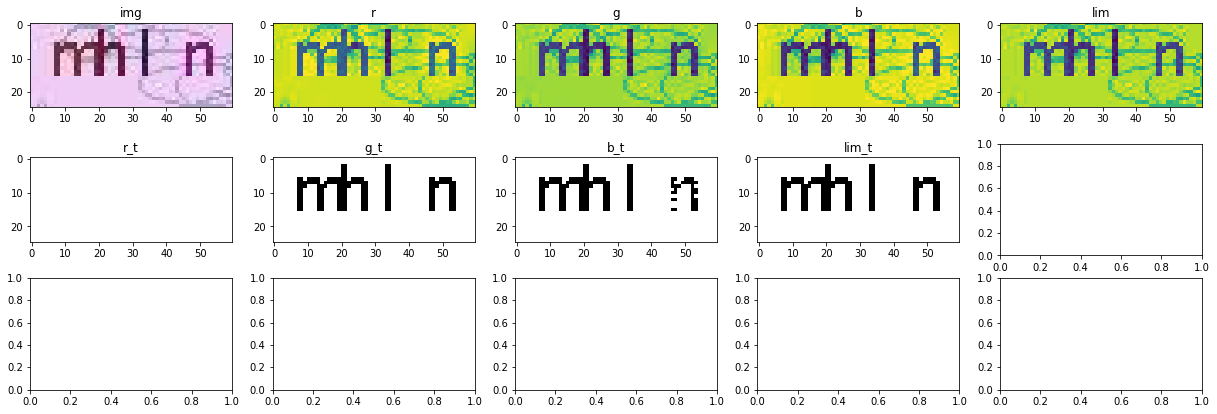

4it [00:06,  1.53s/it]

3.125 2.4 (60, 25) o9ld.png RGB
L
L
L
L


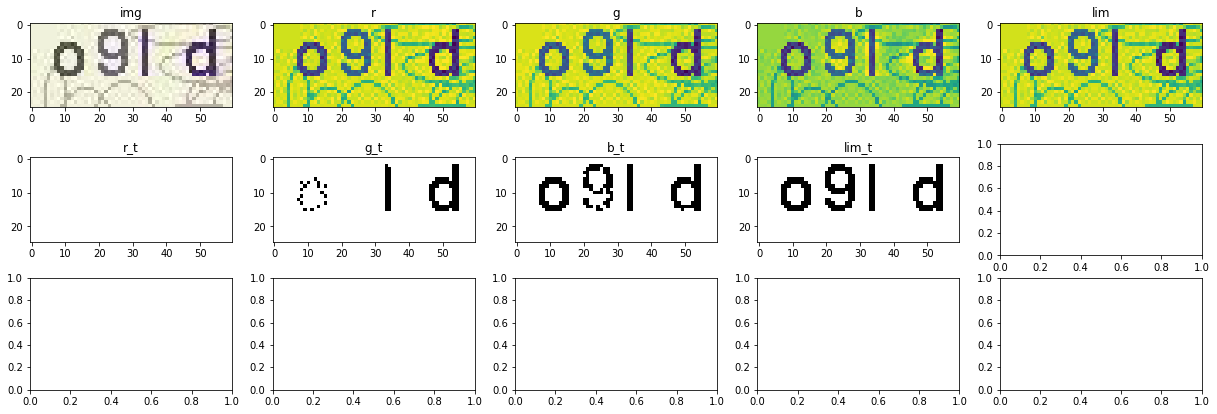

5it [00:07,  1.53s/it]

3.125 2.4 (60, 25) bgn2.png RGB
L
L
L
L


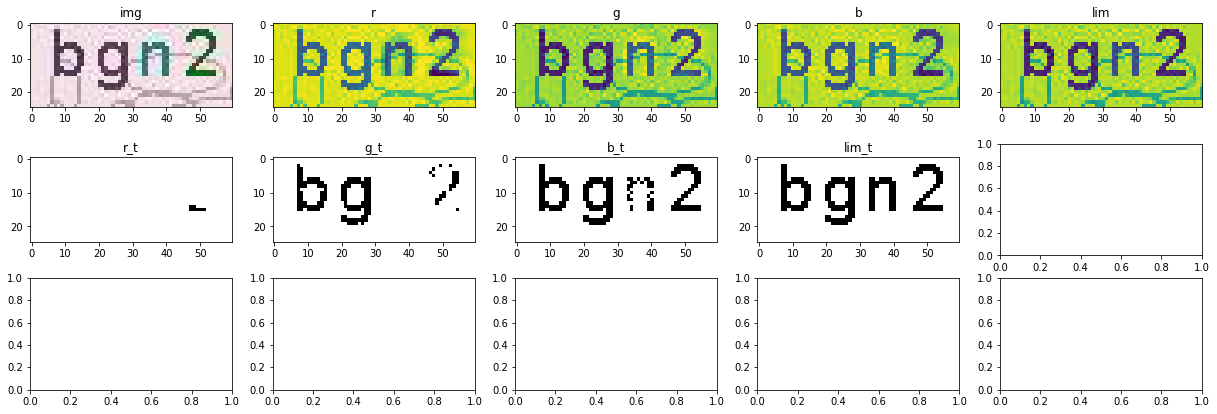

6it [00:09,  1.57s/it]

3.125 2.4 (60, 25) cajc.png RGB
L
L
L
L


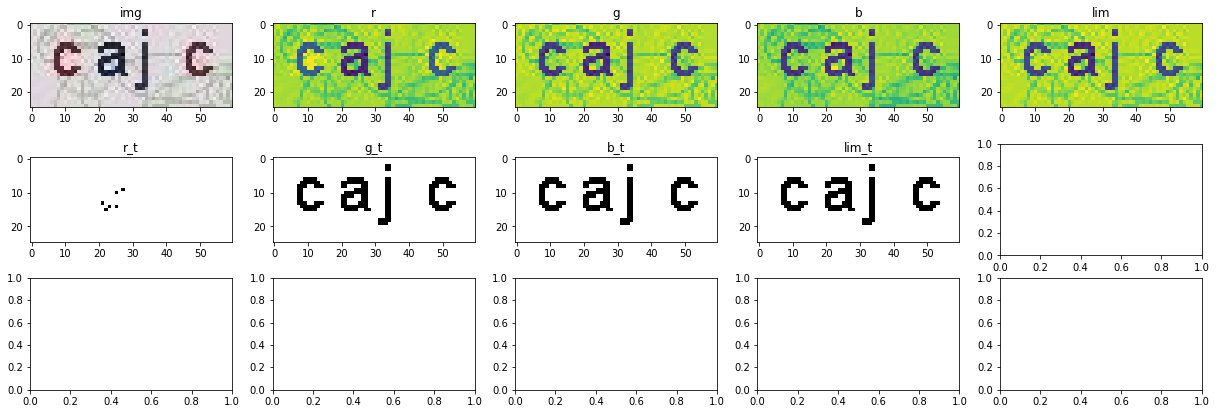

7it [00:10,  1.51s/it]

3.125 2.4 (60, 25) jpjd.png RGB
L
L
L
L


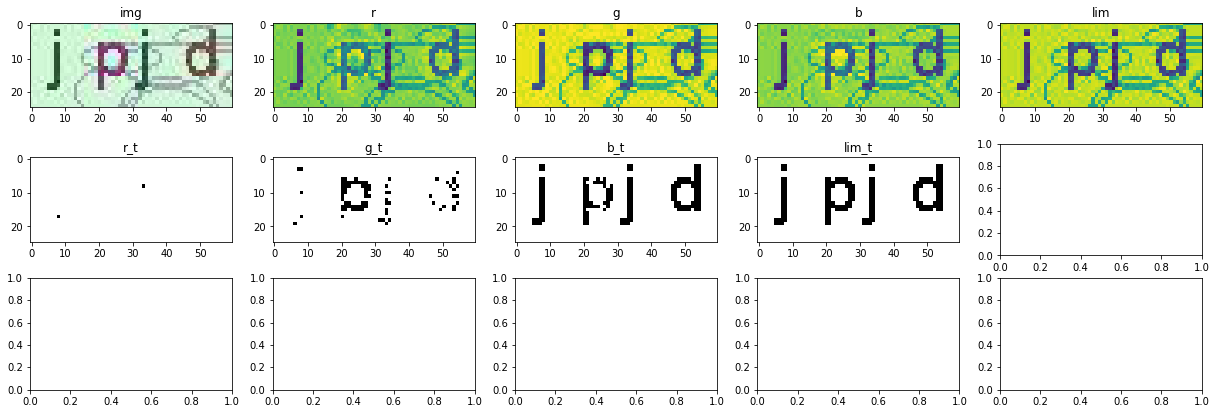

8it [00:12,  1.49s/it]

3.125 2.4 (60, 25) d9vu.png RGB
L
L
L
L


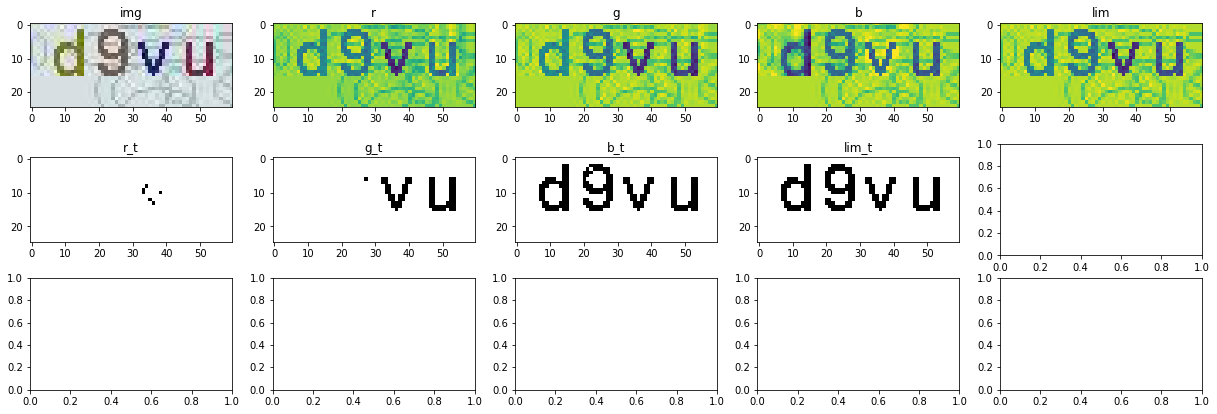

9it [00:14,  1.59s/it]

3.125 2.4 (60, 25) 4w4y.png RGB
L
L
L
L


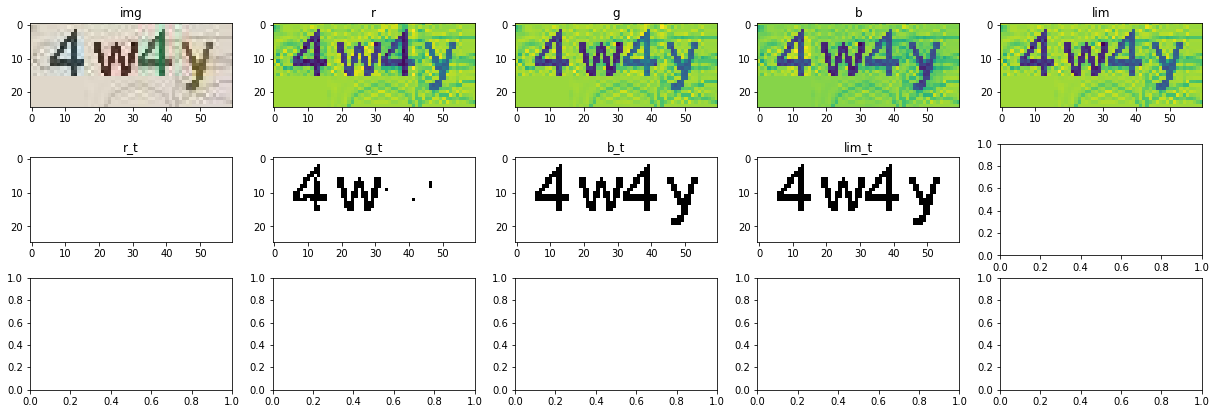

10it [00:15,  1.50s/it]

3.125 2.4 (60, 25) 7lic.png RGB
L
L
L
L


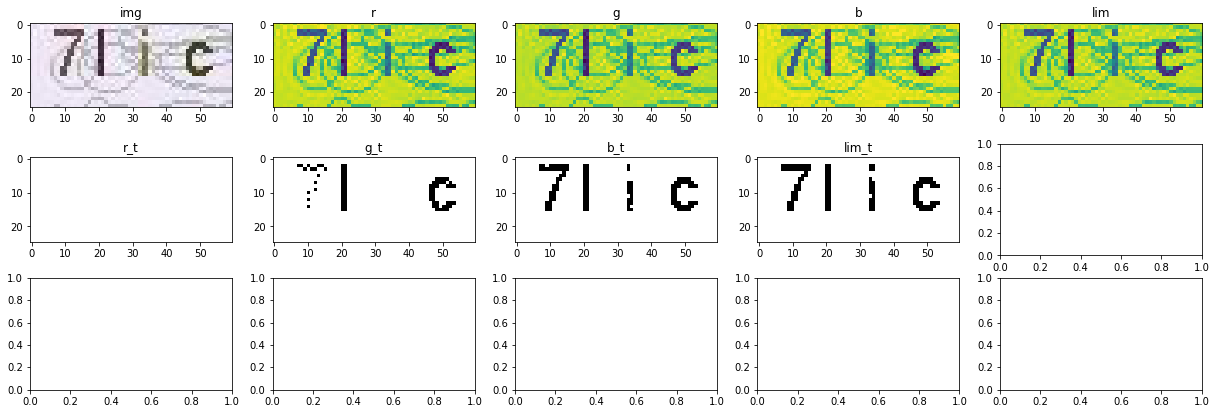

11it [00:16,  1.43s/it]

3.125 2.4 (60, 25) x48i.png RGB
L
L
L
L


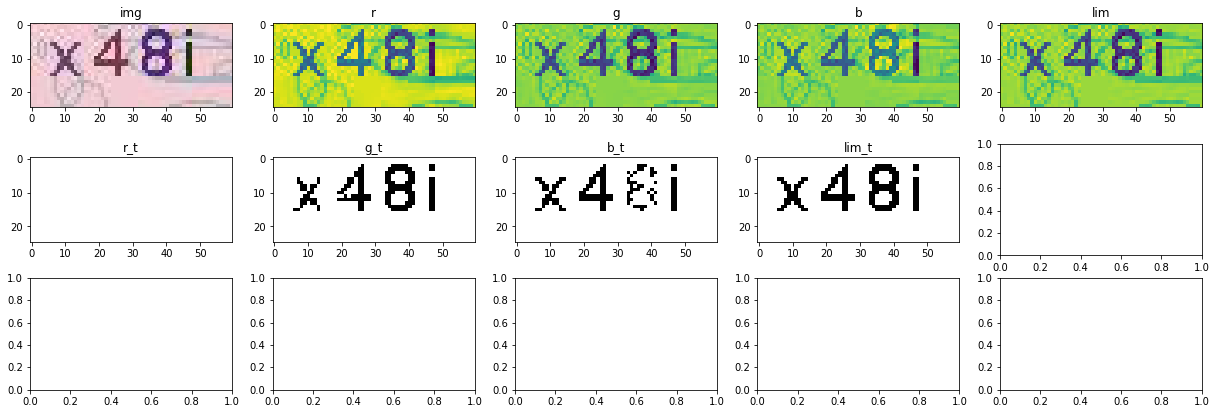

12it [00:18,  1.52s/it]

3.125 2.4 (60, 25) werc.png RGB
L
L
L
L


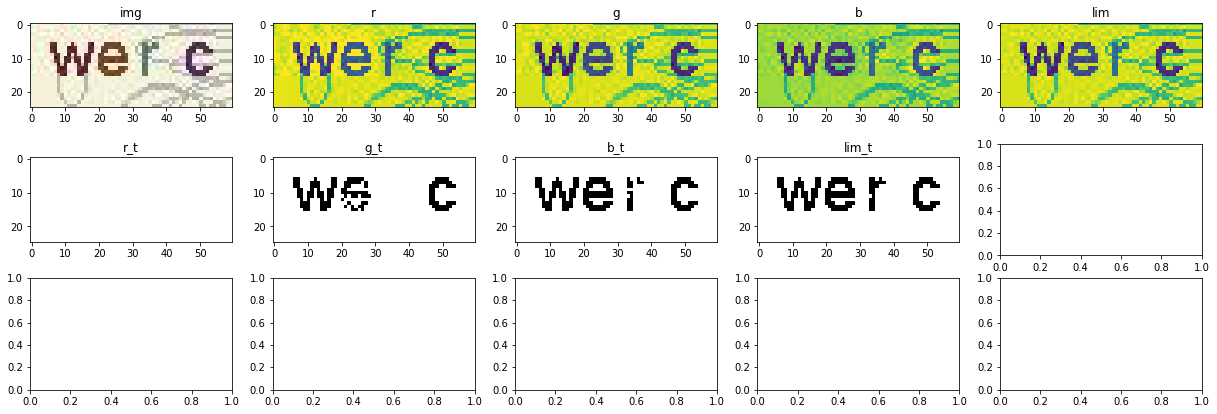

13it [00:20,  1.64s/it]

3.125 2.4 (60, 25) j8da.png RGB
L
L
L
L


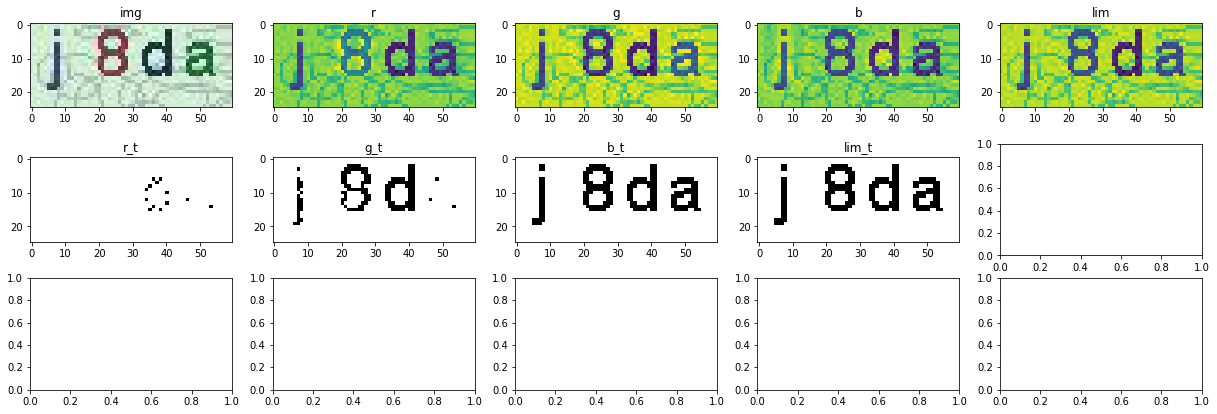

14it [00:21,  1.57s/it]

3.125 2.4 (60, 25) 4bnd.png RGB
L
L
L
L


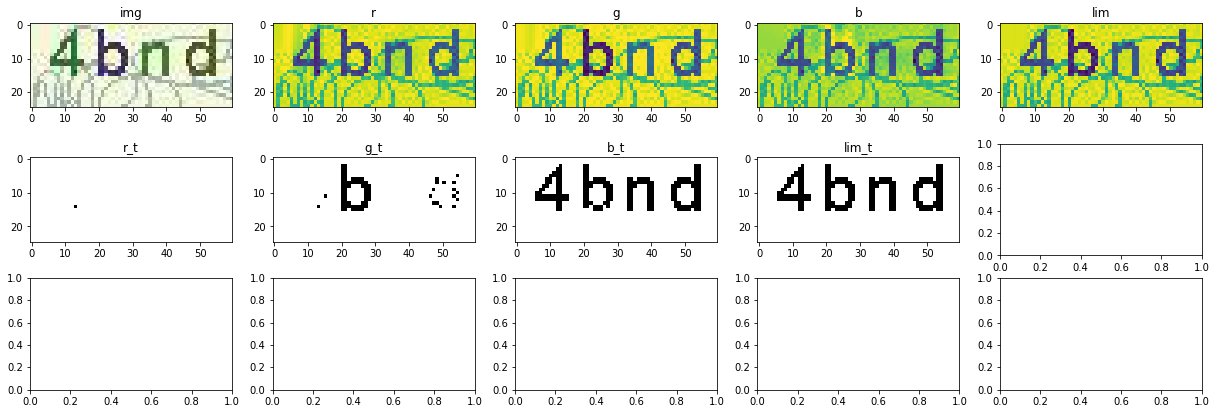

15it [00:24,  1.88s/it]

3.125 2.4 (60, 25) wx2o.png RGB
L
L
L
L


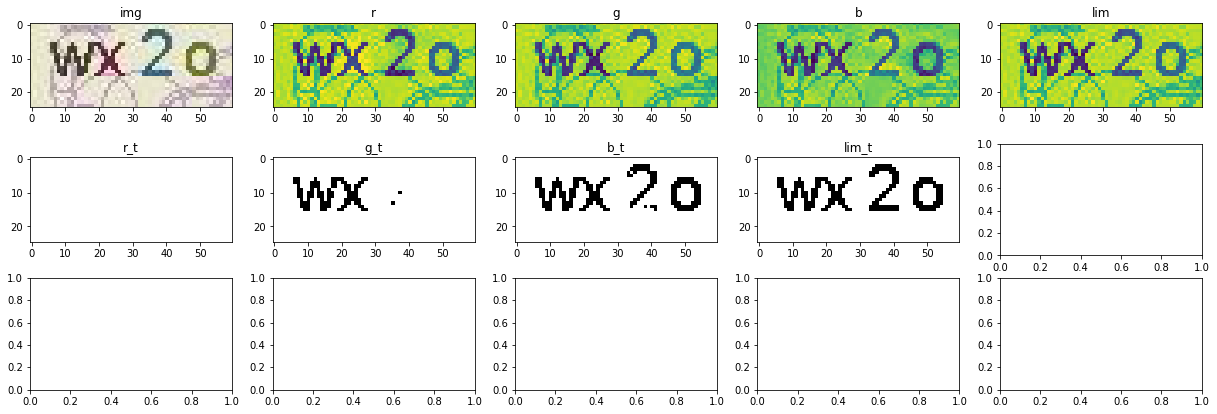

16it [00:26,  2.09s/it]

3.125 2.4 (60, 25) gk5t.png RGB
L
L
L
L


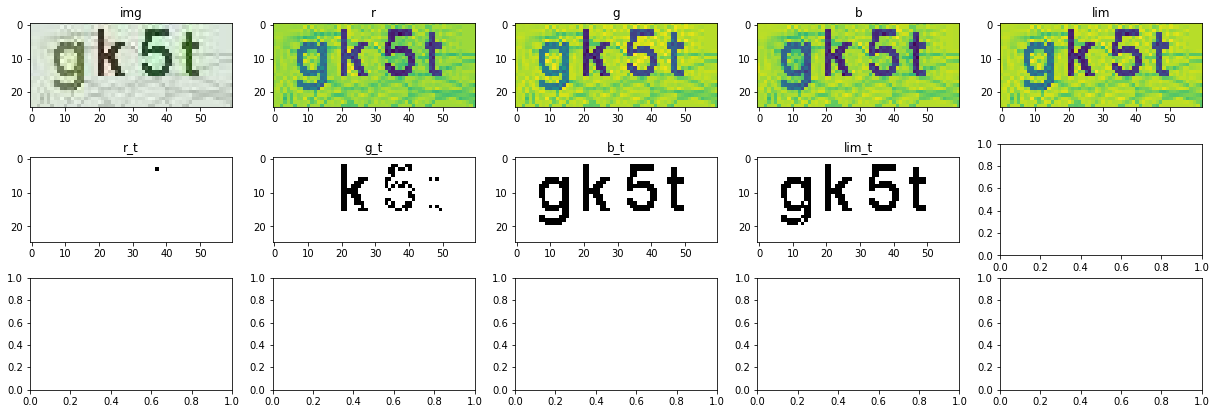

17it [00:29,  2.24s/it]

3.125 2.4 (60, 25) gc60.png RGB
L
L
L
L


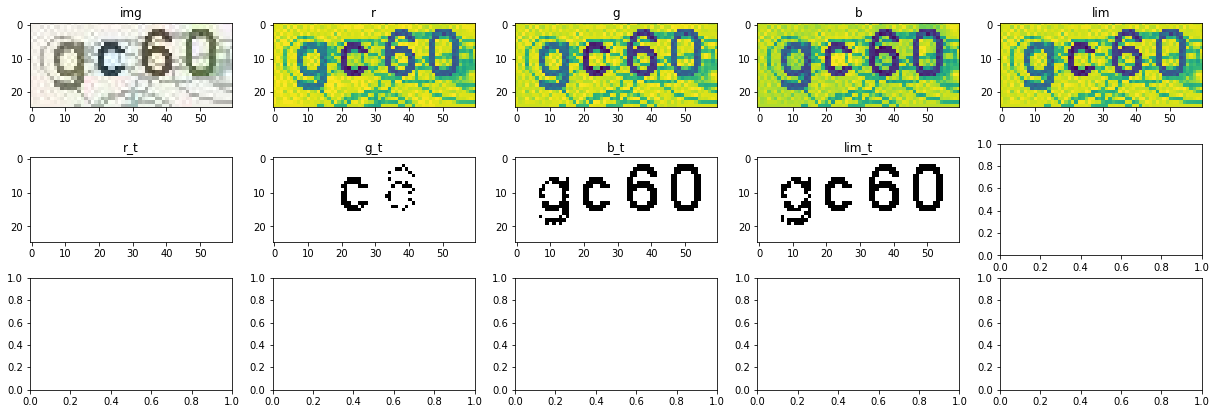

18it [00:33,  1.88s/it]


UnidentifiedImageError: cannot identify image file '/Users/sjhuang/Documents/docs/dataset/unlabel_data/unlabel_data/xyhn.hainan.gov.cn/.DS_Store'

In [1571]:
from tqdm import tqdm
for idx,img_path in tqdm(enumerate(img_paths)):
    threshold = 255
    thresholds = [20,80,110,130]
    res,img_path = handle_img(img_paths[idx], threshold, thresholds)
    ori,handled = res[4],res[8]
    ori_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/ori/{img_path}'
    handled_path = f'/Users/sjhuang/Documents/docs/dataset/pix2pix_data/handle/{img_path}'
    ori.save(ori_path)
    handled.save(handled_path)
   